In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

In [2]:
df = pd.read_csv('./housing.csv')
set_config(transform_output="pandas")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# There are null values that should be treated

In [4]:
df_copy = df.copy()
df_copy.drop('ocean_proximity',axis=1,inplace=True)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_copy)
df_copy = imp_mean.transform(df_copy)
df.iloc[:,:-1] = df_copy.iloc[:,:]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Notice high positive and Negative correlations
We will try to replace these high correlations

/var/folders/vv/jrr00v852xj6f_6pp777r9zw0000gp/T/ipykernel_19821/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

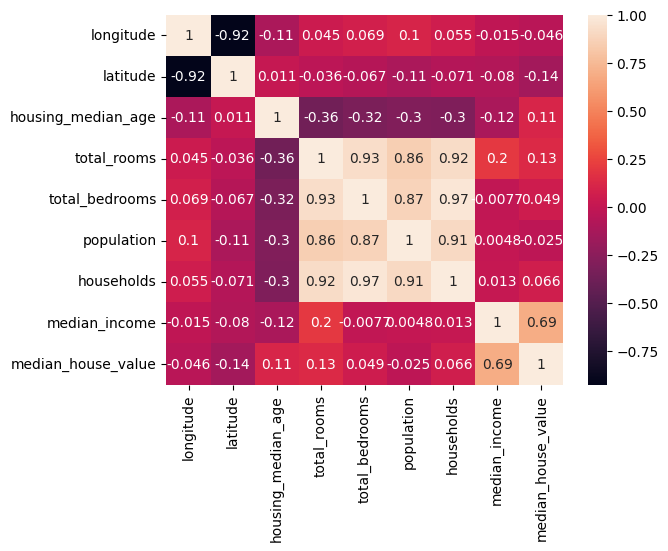

In [6]:
sns.heatmap(df.corr(),annot=True)

# Replacing longitude and latitude with distance
distance represents the distance between each (long, lat) and (minLong, minLat)

In [7]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
    
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    dlon = lon2 - lon1 
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a)) 
    r = 6371
    return(c * r)

In [8]:
minLong, minLat = min(list(df['longitude'].unique())),min(list(df['latitude'].unique()))
df['distance'] = [distance(minLat,i,minLong,j) for (i,j) in list(zip(df['longitude'],df['latitude']))]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,distance
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,10178.695791
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,10180.075626
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,10178.079697
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,10177.005333
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,10177.005333
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,10278.558203
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,10265.453059
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,10265.185703
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,10254.379388


In [9]:
df.drop(['longitude','latitude'],axis=1,inplace=True)

# Replacing total_bedrooms and total_rooms with bedroomPerRoom
bedroomPerRoom represents how many rooms are bed rooms

In [10]:
df['bedroomPerRoom'] = [i/j for (i,j) in list(zip(df['total_bedrooms'],df['total_rooms']))]
df.drop(['total_bedrooms','total_rooms'],axis=1, inplace=True)

# Replace household and population occupation
occupation represents number of occupiers of each houshold

/var/folders/vv/jrr00v852xj6f_6pp777r9zw0000gp/T/ipykernel_19821/3009338077.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

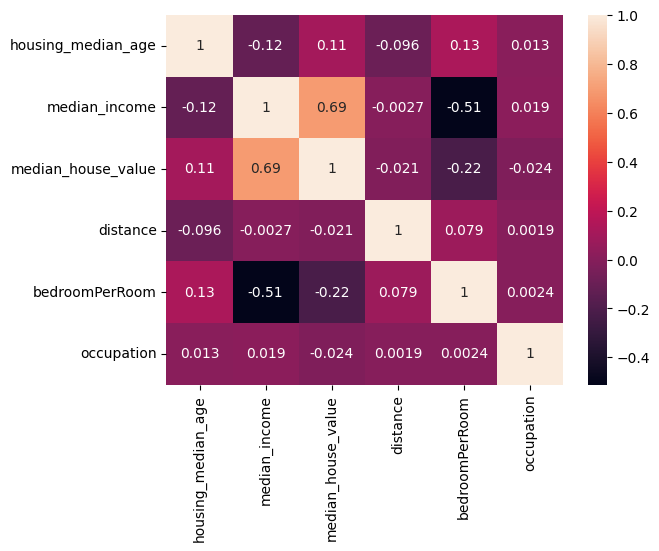

In [11]:
df['occupation'] = [i/j for (i,j) in list(zip(df['population'],df['households']))]
df.drop(['population','households'],axis=1, inplace=True)
sns.heatmap(df.corr(),annot=True)

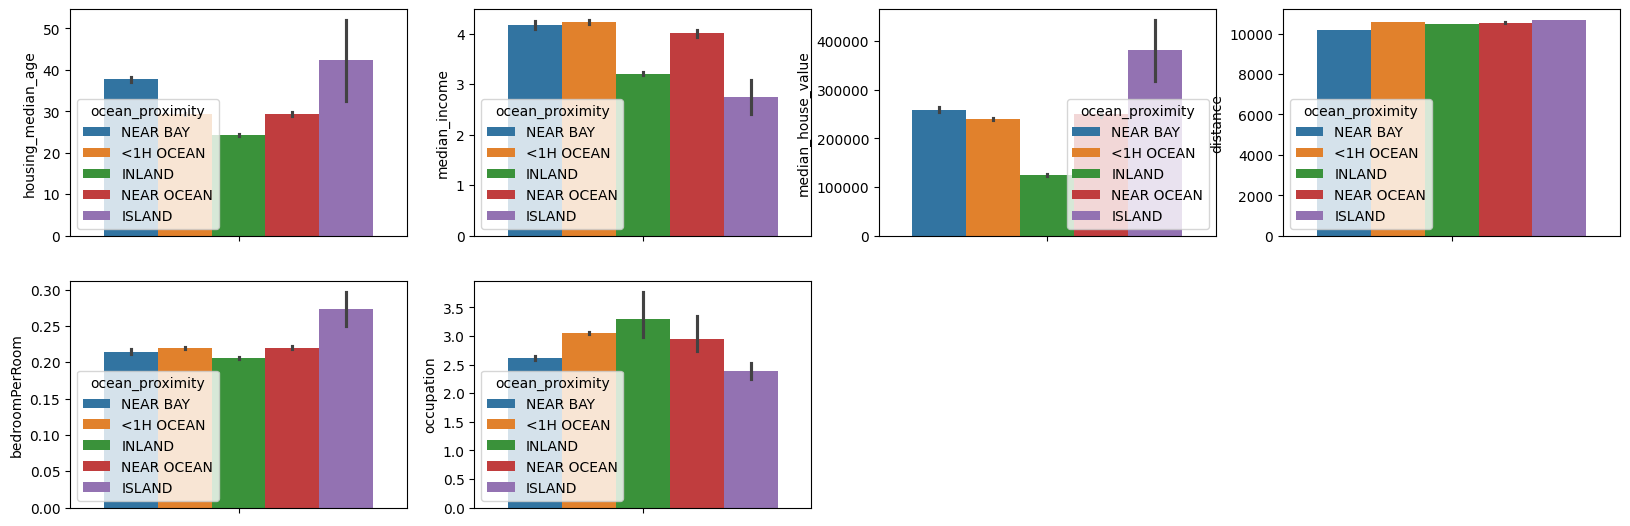

In [12]:
cols = list(df.drop('ocean_proximity',axis=1,inplace=False).columns)
plt.figure(figsize=(20,10))
for i in cols:
    plt.subplot(3,4,cols.index(i)+1)
    sns.barplot(data=df, y=i,hue='ocean_proximity')
plt.show()


In [13]:
df

,housing_median_age,median_income,median_house_value,ocean_proximity,distance,bedroomPerRoom,occupation
0,41.0,8.3252,452600.0,NEAR BAY,10178.695791,0.146591,2.555556
1,21.0,8.3014,358500.0,NEAR BAY,10180.075626,0.155797,2.109842
2,52.0,7.2574,352100.0,NEAR BAY,10178.079697,0.129516,2.802260
3,52.0,5.6431,341300.0,NEAR BAY,10177.005333,0.184458,2.547945
4,52.0,3.8462,342200.0,NEAR BAY,10177.005333,0.172096,2.181467
...,...,...,...,...,...,...,...
20635,25.0,1.5603,78100.0,INLAND,10278.558203,0.224625,2.560606
20636,18.0,2.5568,77100.0,INLAND,10265.453059,0.215208,3.122807
20637,17.0,1.7000,92300.0,INLAND,10265.185703,0.215173,2.325635
20638,18.0,1.8672,84700.0,INLAND,10254.379388,0.219892,2.123209


# Scalling values

In [14]:
scl = StandardScaler()
df_copy = df.copy()
df_copy.drop('ocean_proximity',axis=1,inplace=True)
df_copy = scl.fit_transform(df_copy)
df_copy['ocean_proximity'] = df['ocean_proximity']
df = df_copy
df

,housing_median_age,median_income,median_house_value,distance,bedroomPerRoom,occupation,ocean_proximity
0,0.982143,2.344766,2.129631,-1.305247,-0.973116,-0.049597,NEAR BAY
1,-0.607019,2.332238,1.314156,-1.299609,-0.841159,-0.092512,NEAR BAY
2,1.856182,1.782699,1.258693,-1.307763,-1.217873,-0.025843,NEAR BAY
3,1.856182,0.932968,1.165100,-1.312153,-0.430311,-0.050329,NEAR BAY
4,1.856182,-0.012881,1.172900,-1.312153,-0.607519,-0.085616,NEAR BAY
...,...,...,...,...,...,...,...
20635,-0.289187,-1.216128,-1.115804,-0.897275,0.145445,-0.049110,INLAND
20636,-0.845393,-0.691593,-1.124470,-0.950814,0.010465,0.005021,INLAND
20637,-0.924851,-1.142593,-0.992746,-0.951906,0.009963,-0.071735,INLAND
20638,-0.845393,-1.054583,-1.058608,-0.996054,0.077613,-0.091225,INLAND


In [15]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder().set_output()
temp = df.copy()
enc.fit(temp)
enc.categories_
temp = enc.transform(temp)
df['ocean_proximity'] = temp['ocean_proximity']
df

,housing_median_age,median_income,median_house_value,distance,bedroomPerRoom,occupation,ocean_proximity
0,0.982143,2.344766,2.129631,-1.305247,-0.973116,-0.049597,3.0
1,-0.607019,2.332238,1.314156,-1.299609,-0.841159,-0.092512,3.0
2,1.856182,1.782699,1.258693,-1.307763,-1.217873,-0.025843,3.0
3,1.856182,0.932968,1.165100,-1.312153,-0.430311,-0.050329,3.0
4,1.856182,-0.012881,1.172900,-1.312153,-0.607519,-0.085616,3.0
...,...,...,...,...,...,...,...
20635,-0.289187,-1.216128,-1.115804,-0.897275,0.145445,-0.049110,1.0
20636,-0.845393,-0.691593,-1.124470,-0.950814,0.010465,0.005021,1.0
20637,-0.924851,-1.142593,-0.992746,-0.951906,0.009963,-0.071735,1.0
20638,-0.845393,-1.054583,-1.058608,-0.996054,0.077613,-0.091225,1.0


array([[<AxesSubplot: title={'center': 'housing_median_age'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>],
       [<AxesSubplot: title={'center': 'distance'}>,
        <AxesSubplot: title={'center': 'bedroomPerRoom'}>,
        <AxesSubplot: title={'center': 'occupation'}>],
       [<AxesSubplot: title={'center': 'ocean_proximity'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

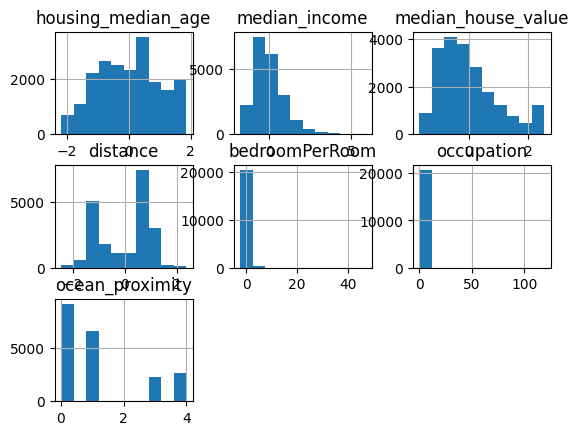

In [16]:
df.hist()

# There might be some outliers

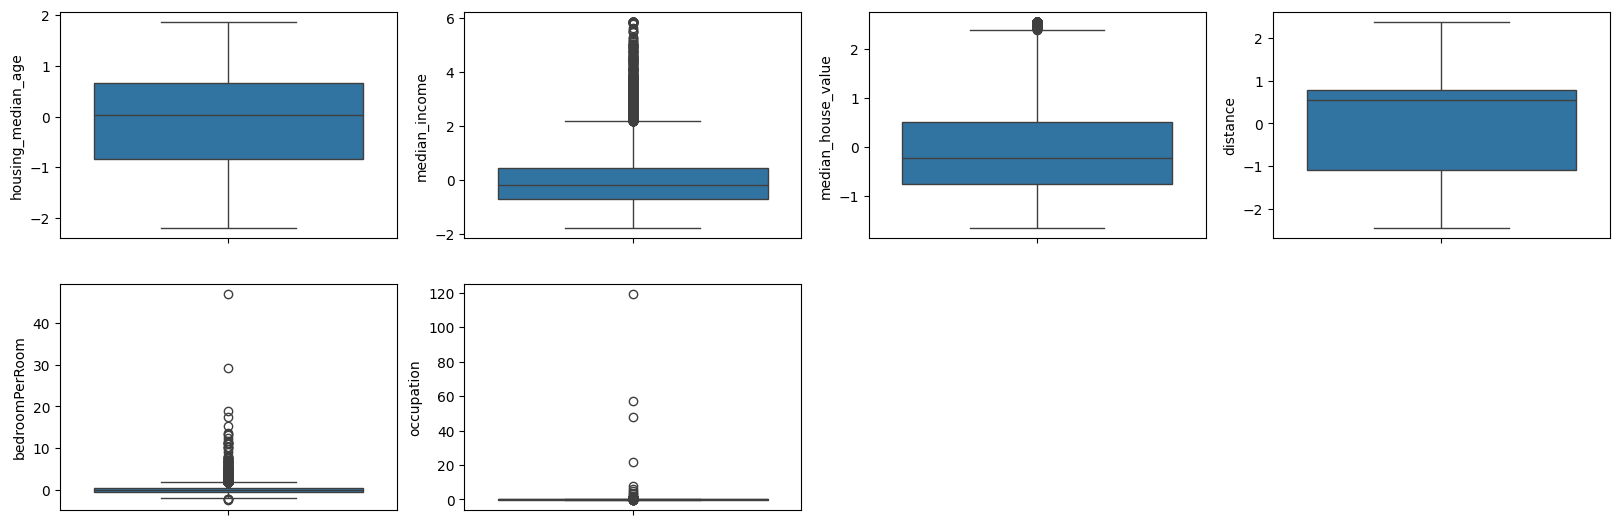

In [17]:
cols = list(df.drop('ocean_proximity',axis=1,inplace=False).columns)
plt.figure(figsize=(20,10))
for i in cols:
    plt.subplot(3,4,cols.index(i)+1)
    sns.boxplot(data=df,y=i)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-package

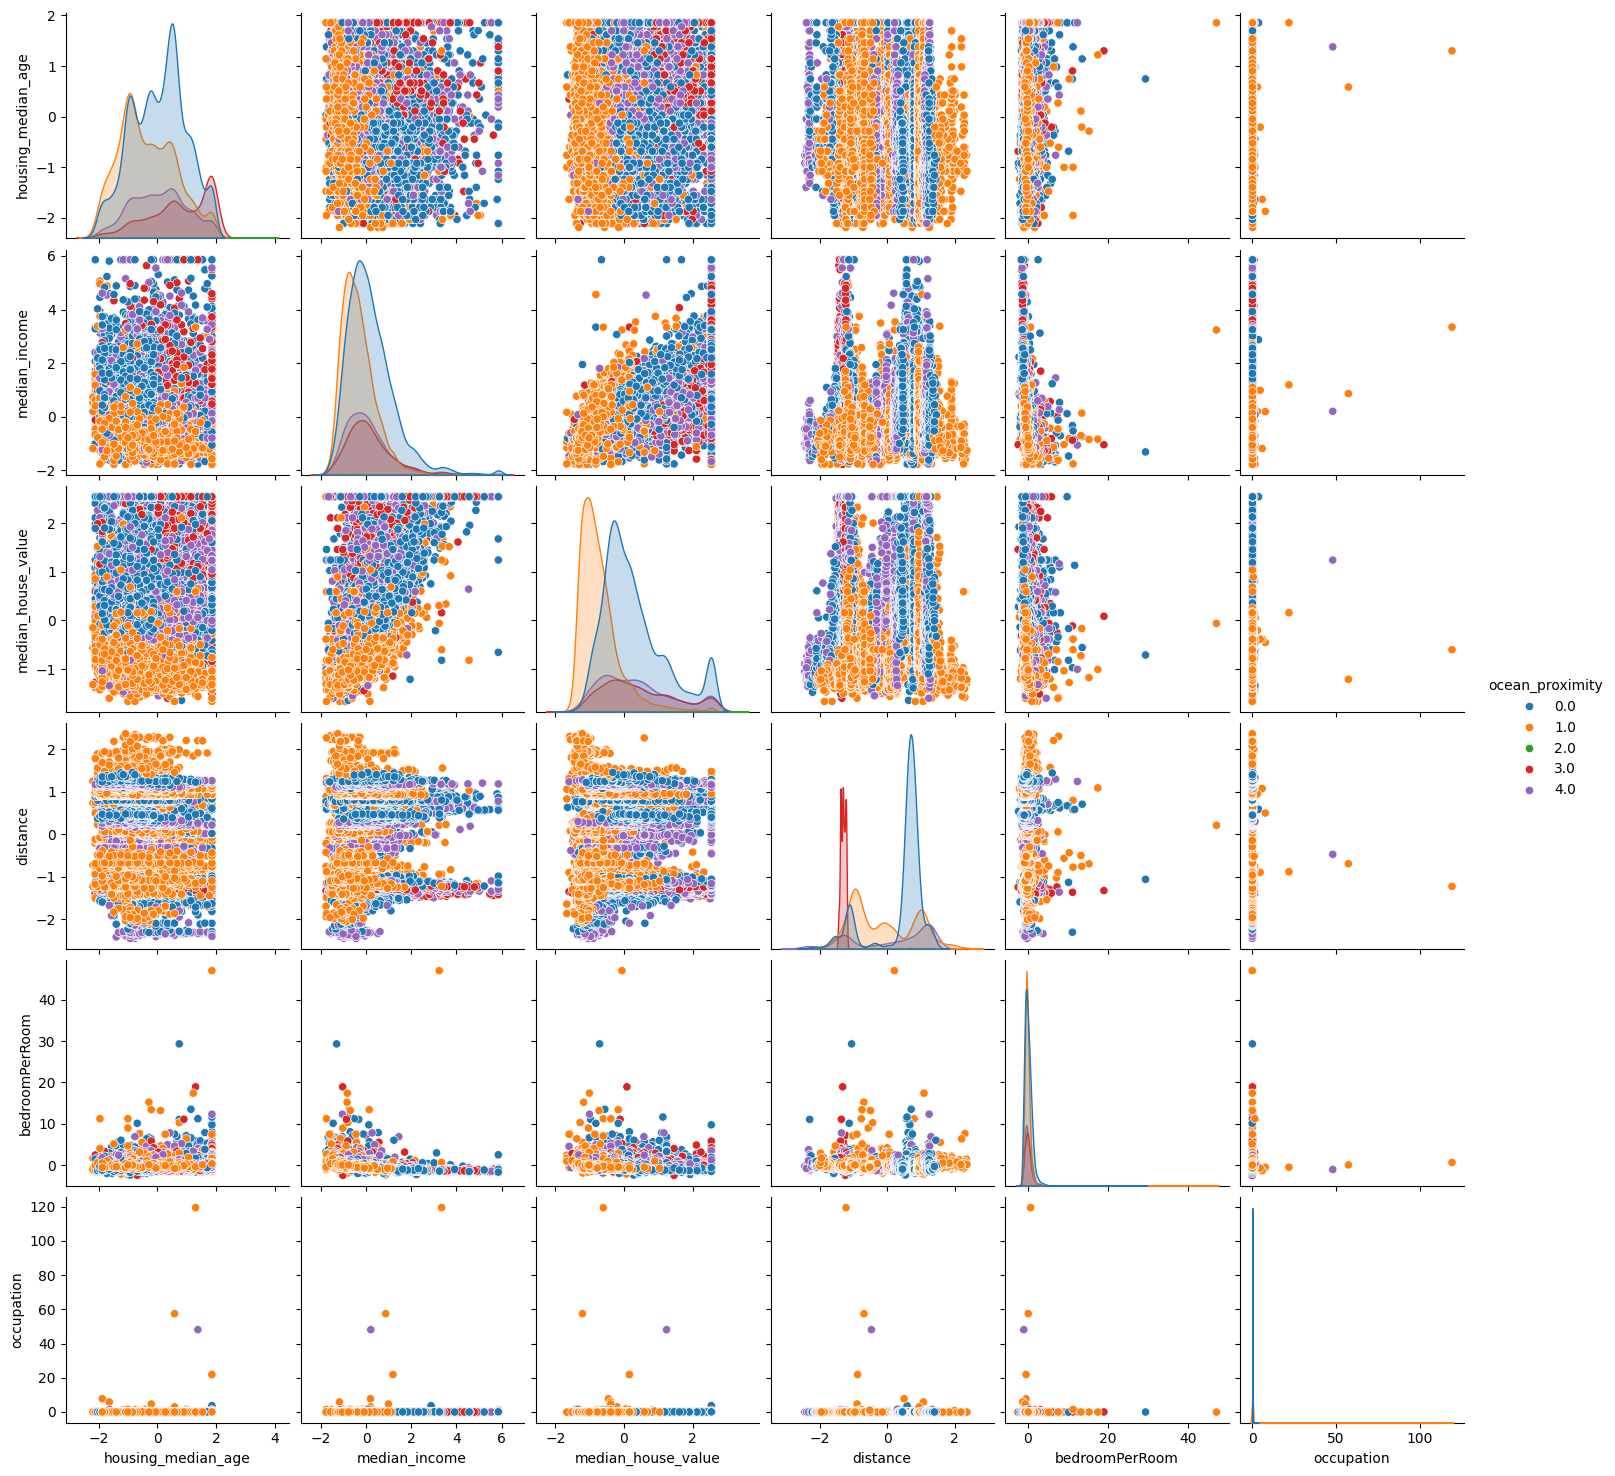

In [18]:
sns.pairplot(data=df, hue='ocean_proximity', palette=sns.color_palette("tab10"))

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(df,df['ocean_proximity']):
    train = df.loc[train_index]
    test = df.loc[test_index]

In [62]:
df.isna().sum()

housing_median_age    0
median_income         0
median_house_value    0
distance              0
bedroomPerRoom        0
occupation            0
ocean_proximity       0
dtype: int64

In [63]:
x_train,y_train = train.drop('median_house_value', axis=1,inplace=False),train['median_house_value']
x_test,y_test = test.drop('median_house_value', axis=1,inplace=False),test['median_house_value']

In [64]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X=x_train, y=y_train)

LinearRegression()

In [65]:
y_predict = reg.predict(X=x_test)

In [66]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_predict))
print(r2_score(y_test,y_predict)*100)

0.44304934994037193
56.121344992342095


In [67]:
from sklearn import linear_model

reg = linear_model.Ridge(alpha=0.5)
reg.fit(X=x_train, y=y_train)
y_predict = reg.predict(X=x_test)
print(mean_squared_error(y_test,y_predict))
print(r2_score(y_test,y_predict)*100)

0.44304940955252625
56.121339088482515


In [68]:
reg = linear_model.Lasso(alpha=0.00001,tol=0.0001)
reg.fit(X=x_train, y=y_train)
y_predict = reg.predict(X=x_test)
print(mean_squared_error(y_test,y_predict))
print(r2_score(y_test,y_predict)*100)

0.4430456770346779
56.12170874902485


In [70]:
reg = linear_model.Lasso(alpha=0.00001,tol=0.0001)
reg.fit(X=x_train, y=y_train)
y_predict = reg.predict(X=x_train)
print(mean_squared_error(y_train,y_predict))
print(r2_score(y_train,y_predict)*100)

0.47046282566137215
52.83853248862438
